In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from collections import Counter
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
df= pd.read_csv('data.csv')

In [ ]:
df

,message,fingers,tail,species
0,pluvia arbor aquos,4,no,Aquari
1,cosmix xeno nebuz odbitaz,5,yes,Zorblax
2,solarix glixx novum galaxum quasar,5,yes,Zorblax
3,arbor insectus pesros ekos dootix nimbus,2,yes,Florian
4,mermax drakos lorix epikoz deftax,4,no,Faerix
...,...,...,...,...
495,empathix sadix disgux dredax pridius afgstix e...,2,no,Emotivor
496,quasar ustron nebulax meteorn,4,no,Quixnar
497,astron xeno ceaestar astron kometa,6,yes,Zorblax
498,sporzom nimbus terram terranix aviana ekos nimbub,2,yes,Florian


In [ ]:
# Group by species and create list of messages for each species
species_message_dict = df.groupby('species')['message'].apply(list).to_dict()

# Display the result
print(species_message_dict)

{'Aquari': ['pluvia arbor aquos', 'gaiax arbor faunar insectus', 'solux terranix faunar rootix pollex pluvia gaiax foliar', 'faunar foliar pollex floraz floraz haunar', 'zephyr gaiax pollex leafon floraz aquos ventus', 'faunar aquos pluvia', 'pallex rootix floran petros aviana pluvia faunar pollex', 'faunar foliar pluvia', 'aviana aquos biompr ekos leafon terranix', 'sporlom floraz floran pollex rootix seepod', 'leafon terranix arbor', 'zephyr herbw biomar ekos ekos', 'aquos biomar terramix arbor leofon', 'petros solux arbor rootix', 'gaial ekos seepod gaiax terram', 'nimbus leafon sporzom aquos arbor aviyna', 'ekos xaunar yentus ekos pollex leafon', 'nimbus rootix arbor solux terram', 'pluvia solux ieafon folnar herba pollex terranix fobiar', 'tekranix sorux rootix floraz arbor pollex terranix petros', 'nimbus herba arbor', 'gayax gaiax leafon petros leafon petros', 'rootix ventus leafon floran zephyr floran', 'foliar zephyr sporzom zephyr terranix zephyr arbsr biomar', 'terranix nikb

In [ ]:
# Initialize an empty dictionary to store unique words for each species
unique_words_by_species = {}

# Group the DataFrame by species
for species, group in df.groupby('species'):
    # Combine all messages into one large string for each species
    all_messages = ' '.join(group['message'])

    # Split the messages into words, convert to lowercase, and use a set for unique words
    unique_words = set(all_messages.split())

    # Store the unique words in the dictionary
    unique_words_by_species[species] = unique_words


In [ ]:
# Compare two sets at a time
for i in range(10):
    for j in range(i+1, 10):
        set1 = unique_words_by_species[list(unique_words_by_species.keys())[i]]
        set2 = unique_words_by_species[list(unique_words_by_species.keys())[j]]
        common_elements = set1 & set2
        print(f"Common between set {list(unique_words_by_species.keys())[i]} and set {list(unique_words_by_species.keys())[j]}: {common_elements}")

Common between set Aquari and set Cybex: set()
Common between set Aquari and set Emotivor: set()
Common between set Aquari and set Faerix: set()
Common between set Aquari and set Florian: {'herba', 'rootix', 'nimbus', 'seepod', 'faunar', 'arbor', 'floran', 'foliar', 'biomar', 'seypod', 'aquos', 'floren', 'floraz', 'insectus', 'leafon', 'zephyr', 'terranix', 'ventus', 'haunar', 'pluvia', 'ekos', 'gaiax', 'sporzom', 'aviana', 'pollex', 'solux', 'petros', 'ariana', 'terram'}
Common between set Aquari and set Mythron: set()
Common between set Aquari and set Nexoon: set()
Common between set Aquari and set Quixnar: set()
Common between set Aquari and set Sentire: set()
Common between set Aquari and set Zorblax: set()
Common between set Cybex and set Emotivor: set()
Common between set Cybex and set Faerix: set()
Common between set Cybex and set Florian: set()
Common between set Cybex and set Mythron: set()
Common between set Cybex and set Nexoon: {'nexus', 'digitron', 'lazeron', 'circux', 'vi

species       Aquari  Cybex  Emotivor  Faerix  Florian  Mythron  Nexoon  \
fingers tail                                                              
0       no         0      4         1       0        0        0       0   
1       no         0     14        15       0        1        0       0   
2       no        12     14        18       3        0        0       2   
3       no         9     15         2      15        3        0       2   
4       no         9      1         0      14        2        1       1   
5       no        12      0         0       2        3        1       1   
6       no         2      0         0       0        0        2       1   
7       no         0      0         0       0        0        3       0   
8       no         0      0         0       0        0        2       0   
0       yes        0      1         0       0        3        0       0   
1       yes        0      4         4       0       13        0       1   
2       yes        0     

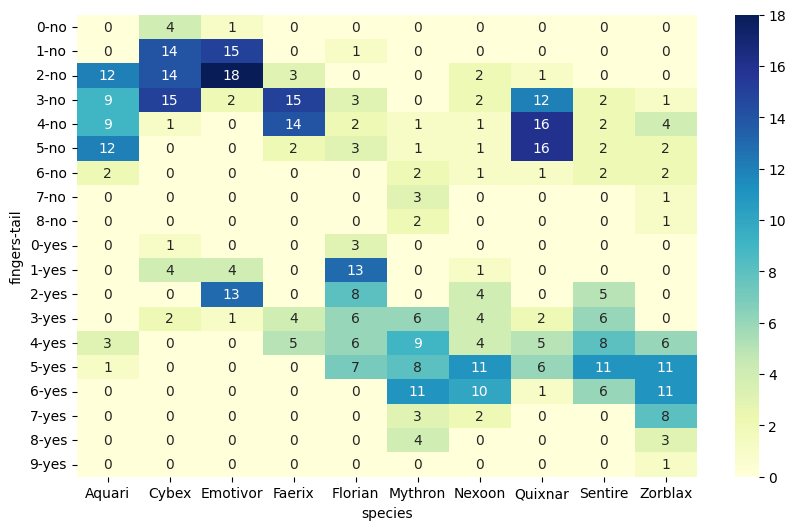

In [ ]:
# Create the crosstab
crosstab = pd.crosstab(index=[df['fingers'], df['tail']], columns=df['species'])

# Sort the index by 'tail' to group 'yes' and 'no' together
sorted_crosstab = crosstab.sort_index(level='tail')

# Display the sorted crosstab
print(sorted_crosstab)


# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_crosstab, annot=True, cmap='YlGnBu')

# Show the plot
plt.show()

In [ ]:
# Sample data
sentences = df['message']
# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=636)  # Assume vocab size of 10k
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
index= tokenizer.index_word
index

{1: 'terranix',
 2: 'sirenix',
 3: 'pluvia',
 4: 'nebuz',
 5: 'solarix',
 6: 'quasar',
 7: 'ragex',
 8: 'nebulax',
 9: 'astron',
 10: 'faerix',
 11: 'gryphox',
 12: 'cosmix',
 13: 'cryptoz',
 14: 'floraz',
 15: 'vortex',
 16: 'novum',
 17: 'quantix',
 18: 'quantaz',
 19: 'herox',
 20: 'shamex',
 21: 'lazeron',
 22: 'celestar',
 23: 'pollex',
 24: 'virtua',
 25: 'glixx',
 26: 'robonix',
 27: 'calmox',
 28: 'ventus',
 29: 'fearix',
 30: 'ufox',
 31: 'pulsar',
 32: 'neuraz',
 33: 'dredax',
 34: 'anxius',
 35: 'joyzor',
 36: 'awezom',
 37: 'shockus',
 38: 'aeon',
 39: 'rootix',
 40: 'orbitaz',
 41: 'warpz',
 42: 'novax',
 43: 'unikor',
 44: 'galaxum',
 45: 'faunar',
 46: 'titanos',
 47: 'pridius',
 48: 'stardux',
 49: 'herba',
 50: 'xeno',
 51: 'empathix',
 52: 'zenox',
 53: 'luvium',
 54: 'gaiax',
 55: 'biomar',
 56: 'blissam',
 57: 'kometa',
 58: 'excitar',
 59: 'nanobyt',
 60: 'mechan',
 61: 'leafon',
 62: 'elvex',
 63: 'petros',
 64: 'datax',
 65: 'fenix',
 66: 'ekstax',
 67: 'circux',

In [ ]:
embeding =  np.zeros((636, 10))
species =list(unique_words_by_species.keys())
for i in species:
    for j in list(index.keys()):
        if index[j] in np.array(list(unique_words_by_species[i])):
          embeding[j-1] = embeding[j-1]+np.eye(1, 10, k=species.index(i), dtype=int)


In [ ]:
def word_index(word):
    # Value to find
    value = word

    # Find the first key with the given value
    key = None
    for k, v in index.items():
        if v == value:
            key = k
            break
    return key

def word_to_vec(word):
    ind= word_index(word)
    return embeding[ind-1]

def sentence_to_vec(sentence):
    sen= sentence.split()
    sen_filtered = [i for i in sen if i in index.values()]



    l = len(sen)
    return np.array([word_to_vec(w) for w in sen_filtered ]),l


In [ ]:
other_feature=np.array(pd.concat((pd.get_dummies(df['fingers']).astype(int),pd.get_dummies(df['tail']).astype(int)),axis=1))

In [ ]:
pd.get_dummies(df['tail']).astype(int)

,no,yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
495,1,0
496,1,0
497,0,1
498,0,1


In [ ]:
x=[]
y=[]
for p in range(500):
    sentence= df['message'].iloc[p]
    sp= df['species'].iloc[p]
    vec= sentence_to_vec(sentence)
    l= vec[1]
    for g in range(l):
        x.append(np.concatenate((vec[0][g],other_feature[p])))
        y.append(np.eye(1, 10, k=species.index(sp)))

x= np.array(x)
y= np.array(y).reshape(x.shape[0],10)

In [ ]:
x.shape

(2719, 22)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the KNN classifier (you can choose k based on your needs, e.g., k=3)
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
x.shape,y.shape

((2719, 22), (2719, 10))

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}")

Accuracy of KNN model: 85.29


In [ ]:
for k in range(1, 110):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy: {accuracy * 100:.2f}%")



k=1, Accuracy: 83.82%
k=2, Accuracy: 72.24%
k=3, Accuracy: 84.93%
k=4, Accuracy: 80.33%
k=5, Accuracy: 85.29%
k=6, Accuracy: 83.09%
k=7, Accuracy: 86.95%
k=8, Accuracy: 84.19%
k=9, Accuracy: 86.76%
k=10, Accuracy: 85.29%
k=11, Accuracy: 89.89%
k=12, Accuracy: 87.32%
k=13, Accuracy: 89.71%
k=14, Accuracy: 88.24%
k=15, Accuracy: 89.34%
k=16, Accuracy: 88.05%
k=17, Accuracy: 89.15%
k=18, Accuracy: 88.05%
k=19, Accuracy: 88.42%
k=20, Accuracy: 85.29%
k=21, Accuracy: 87.87%
k=22, Accuracy: 86.03%
k=23, Accuracy: 87.32%
k=24, Accuracy: 86.76%
k=25, Accuracy: 87.13%
k=26, Accuracy: 86.21%
k=27, Accuracy: 86.58%
k=28, Accuracy: 85.66%
k=29, Accuracy: 86.58%
k=30, Accuracy: 84.74%
k=31, Accuracy: 86.40%
k=32, Accuracy: 84.74%
k=33, Accuracy: 85.66%
k=34, Accuracy: 84.93%
k=35, Accuracy: 85.48%
k=36, Accuracy: 85.66%
k=37, Accuracy: 85.48%
k=38, Accuracy: 84.74%
k=39, Accuracy: 85.66%
k=40, Accuracy: 84.56%
k=41, Accuracy: 85.29%
k=42, Accuracy: 83.27%
k=43, Accuracy: 85.11%
k=44, Accuracy: 84.0

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.89%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assume y_test and y_pred are the true and predicted labels from your multi-class classifier

# Precision, Recall, and F1 Score (for multi-class classification)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Precision, Recall, F1 Score
print(f'Precision (weighted): {precision}')
print(f'Recall (weighted): {recall}')
print(f'F1 Score (weighted): {f1}')

Precision (weighted): 0.9053883759296215
Recall (weighted): 0.8988970588235294
F1 Score (weighted): 0.8987038172127572


In [ ]:
def input_to_output(message,finger,tail):
    vec_other= np.concatenate([np.eye(1, 10, finger, dtype=int).reshape(10,),np.array([1,0]) if tail=='no' else np.array([0,1])])
    vec_word = sentence_to_vec(message)[0]
    vec=[]
    for j in vec_word:
        vec.append(np.concatenate([j,vec_other]))
    result= knn.predict(vec)
    return max_prob(result)


In [ ]:
def max_prob(arrays):
    # Convert arrays to tuples (since numpy arrays aren't hashable)
    tuple_arrays = [tuple(arr) for arr in arrays]

    # Count occurrences of each array (tuple form)
    array_counter = Counter(tuple_arrays)

    # Find the most common array
    most_common_array, count = array_counter.most_common(1)[0]

    # Convert back to numpy array if needed
    most_common_array = np.array(most_common_array)

    return most_common_array


In [ ]:
def data_to_output(data):
    mesasage= data['message']
    tail= data['tail']
    fingers= data['fingers']
    output=[]
    for i,j,k in zip(mesasage,tail,fingers):
        output.append(input_to_output(i,k,j))
    return np.array(output)

In [ ]:
prediction=data_to_output(df)

In [ ]:
prediction[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
y_true = np.array([np.eye(1, 10, k=species.index(i), dtype=int).flatten() for i in df['species']])

In [ ]:
accuracy_score(y_true, prediction)

0.87

In [ ]:
# Precision, Recall, and F1 Score (for multi-class classification)
precision = precision_score(y_true, prediction, average='weighted')
recall = recall_score(y_true, prediction, average='weighted')
f1 = f1_score(y_true, prediction, average='weighted')

# Print Precision, Recall, F1 Score
print(f'Precision (weighted): {precision}')
print(f'Recall (weighted): {recall}')
print(f'F1 Score (weighted): {f1}')


Precision (weighted): 0.8819052483464108
Recall (weighted): 0.87
F1 Score (weighted): 0.8692988889406792


In [ ]:
auc = roc_auc_score(y_true, prediction, multi_class='ovr', average='macro')
print(f'Multiclass AUC-ROC score (macro average): {auc}')

Multiclass AUC-ROC score (macro average): 0.9285602910847945


In [ ]:
df_test = pd.read_csv('test_iitd.csv')

In [ ]:
test_pre=data_to_output(df_test)

In [ ]:
test_pre.sum(axis=0)

array([37., 28., 33., 27., 24., 36., 26., 25., 39., 24.])